In [45]:
from openai import OpenAI
import json, os, sys
import os
import re
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

### Load answers

In [46]:
source_filename = "../data/processed/UN_data.json"
des_filename = "../data/processed/UN_data_with_narrative_answers.json"

# Load articles
with open(source_filename, 'r', encoding='utf-8') as f:
    articles = json.load(f)

# Load questions
with open('../data/processed/narrative_questions.json', 'r', encoding='utf-8') as f:
    questions = json.load(f)

#print number of questions
print("Number of questions:", len(questions))

# Set API key
client = OpenAI(
    api_key=os.getenv("OPENAI_API_KEY"),
)

Number of questions: 6


In [47]:
def get_answers(article, questions, model):
    article_content = article.get('text')
    print(f"Proceeding article")
    pre = "You are an AI trained to understand speeches and generate concise answers to multiple-choice questions based on the content. \
        Please read the following speech carefully. After reading, answer ALL the questions listed below. \
            Your answers must be in capital letters and formatted as a single string, where each question number is followed by its corresponding answer letter. \
                Separate each question-answer pair with a semicolon. \
                    Example format: 1A;2B;3C;4D;... \n\n"

    prompt = pre + f"Speech Content:\n{article_content}\n\n Questions: {questions}\n"
    try:
        response = client.chat.completions.create(
            model=model,
            messages=[
                {"role": "user", "content": prompt}
            ],
            temperature=0
        )
    except Exception as e:
        print(f"Error: {e}")
    return response

In [48]:
def convert_string_to_dict(answer_string):
    if answer_string == "":
        return {}
    if answer_string[-1] == ';':
        answer_string = answer_string[:-1]
    return {item[:-1]: item[-1] for item in answer_string.split(';')}

results = []
iteration = 0
max_iteration = len(articles)

for article in articles:

    answers = get_answers(article, questions, model="gpt-4o")

    pure_answers = answers.choices[0].message.content
    print(pure_answers)

    # convert string to dictionary 1A;2B;3C;44D to {'1': 'A', '2': 'B', '3': 'C', '44': 'D'}
    processed_answers = convert_string_to_dict(pure_answers)
    article['Narrative_answers']= processed_answers

    results.append(article)
    iteration += 1
    print(f"Processed {iteration} out of {max_iteration}")


# Save results to a JSON file
with open(des_filename, 'w', encoding='utf-8') as f:
    json.dump(results, f, ensure_ascii=False, indent=4)

Proceeding article
1A;2A;3C;4A;5A;6A
Processed 1 out of 38
Proceeding article
1C;2A;3B;4A;5A;6A
Processed 2 out of 38
Proceeding article
1C;2B;3B;4A;5A;6A
Processed 3 out of 38
Proceeding article
1C;2A;3A;4A;5A;6A
Processed 4 out of 38
Proceeding article
1A;2B;3C;4C;5C;6C
Processed 5 out of 38
Proceeding article
1C;2C;3C;4C;5C;6C
Processed 6 out of 38
Proceeding article
1C;2B;3B;4A;5A;6C
Processed 7 out of 38
Proceeding article
1A;2A;3C;4B;5A;6A
Processed 8 out of 38
Proceeding article
1A;2A;3C;4A;5A;6A
Processed 9 out of 38
Proceeding article
1A;2A;3C;4A;5A;6A
Processed 10 out of 38
Proceeding article
1B;2A;3B;4B;5A;6A
Processed 11 out of 38
Proceeding article
1B;2A;3B;4A;5A;6A
Processed 12 out of 38
Proceeding article
1A;2A;3A;4A;5A;6A
Processed 13 out of 38
Proceeding article
1B;2A;3B;4A;5A;6A
Processed 14 out of 38
Proceeding article
1C;2A;3C;4A;5A;6A
Processed 15 out of 38
Proceeding article
1C;2A;3C;4A;5A;6A
Processed 16 out of 38
Proceeding article
1C;2A;3B;4A;5A;6A
Processed 17

In [50]:
updated_json = "../data/processed/UN_data_with_narrative_answers.json"
with open(updated_json, 'r', encoding='utf-8') as f:
    articles = json.load(f)

articles[0]

{'session': 60,
 'year': 2005,
 'country': 'FRA',
 'text': 'Speaking for the first time from this rostrum, I wish to\nreaffirm here the importance France attaches to the\nmultilateral system. Our common future cannot be\nenvisaged without strengthening it.\nThe declaration adopted the day before yesterday\nis a milestone in that direction, even if it does not meet\nall our expectations. Indeed, the text makes some\nsignificant advances. I am thinking in particular of\ninnovative financing for development. I am also\nthinking of the decision to establish a peacebuilding\ncommission within the Security Council. Finally, I am\nthinking of the establishment of a Human Rights\nCouncil and the endorsement of the principle of the\nresponsibility to protect. Now it is up to us to put those\nnew concepts into practice.\nIn that connection, I wish to pay tribute here to\nthe remarkable work that has been done under the\nstewardship of Mr. Jean Ping.\nBut let us not underestimate the extent of th

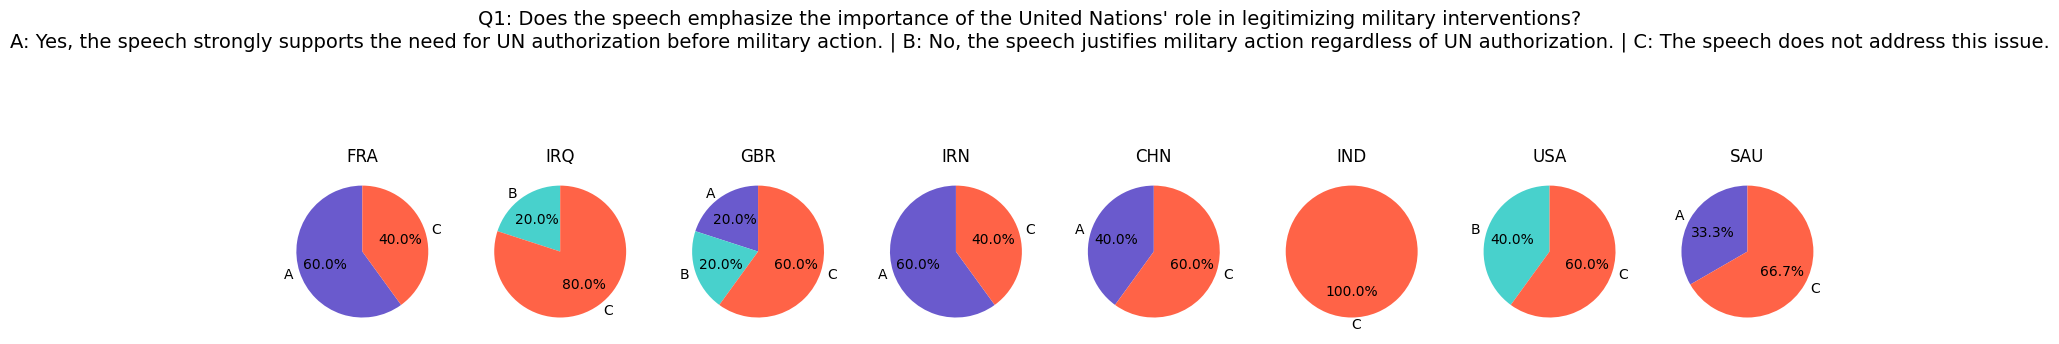

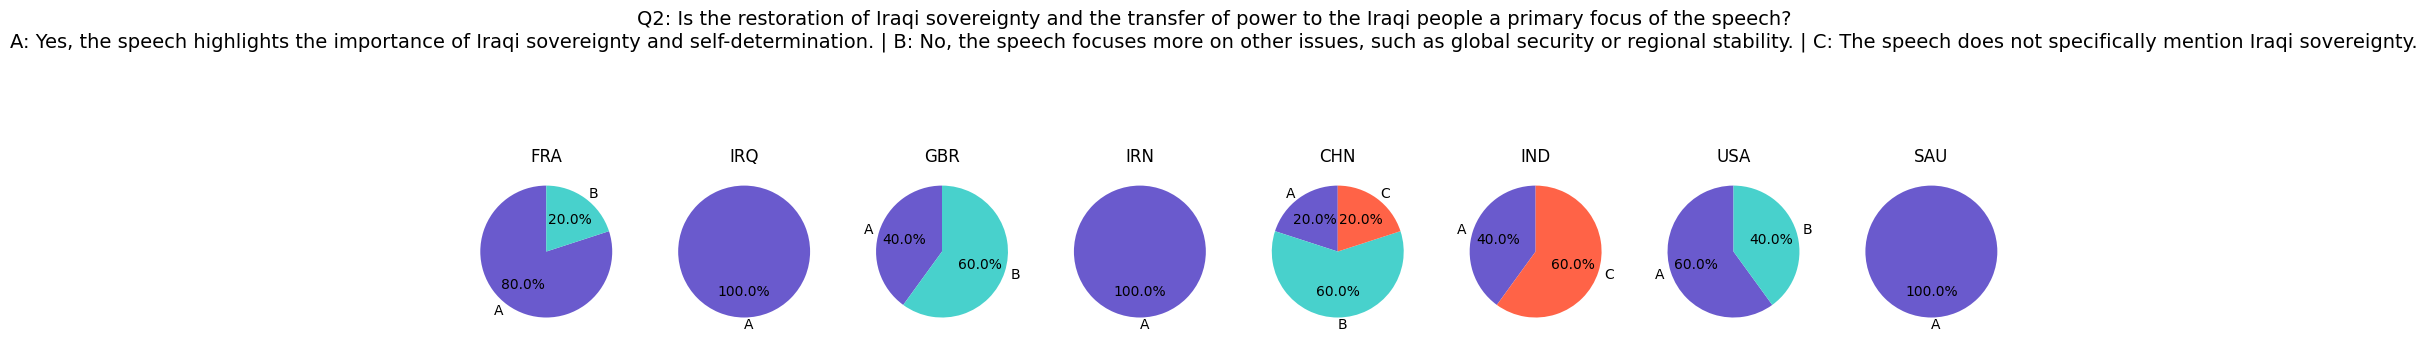

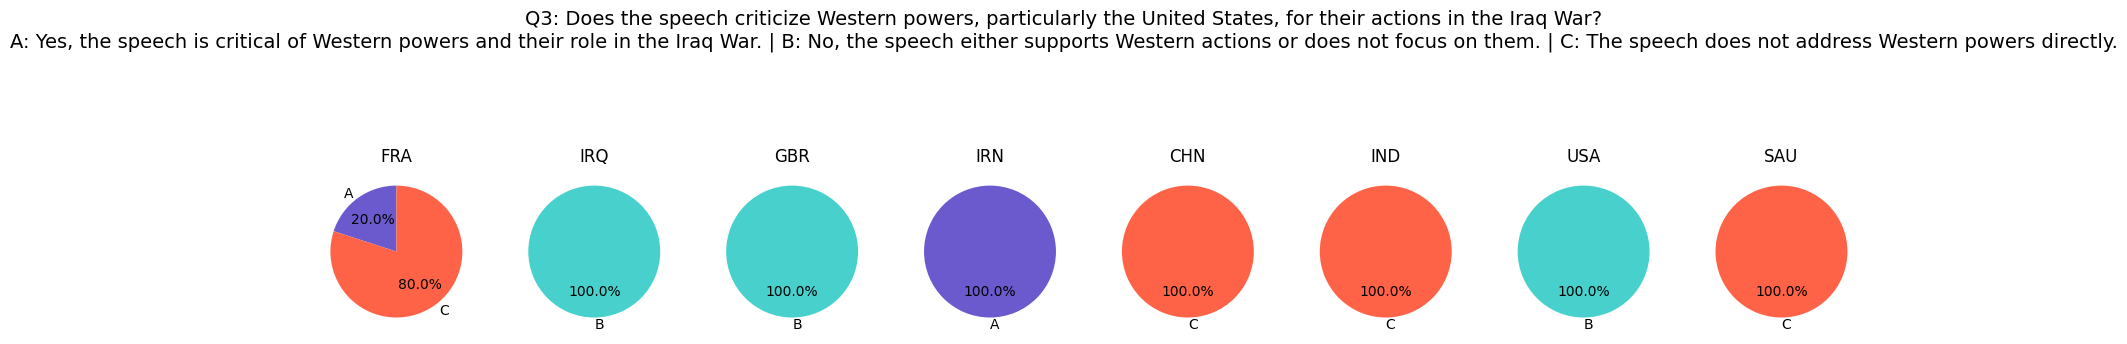

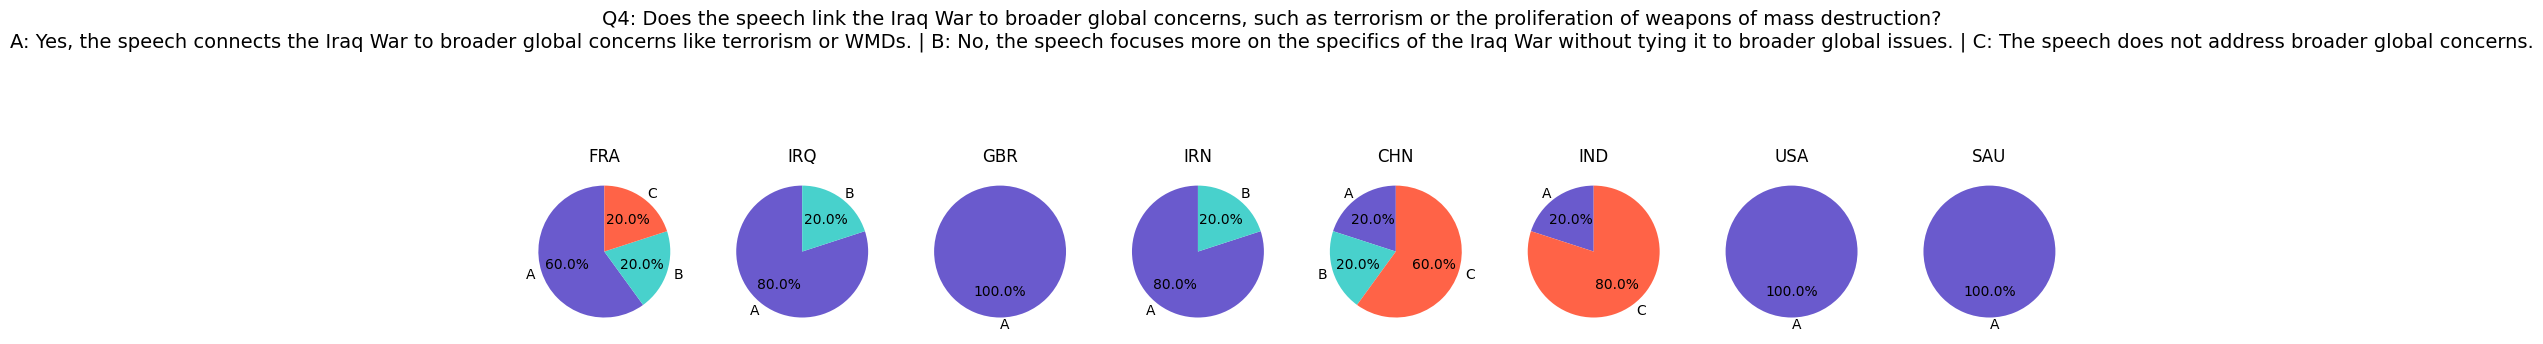

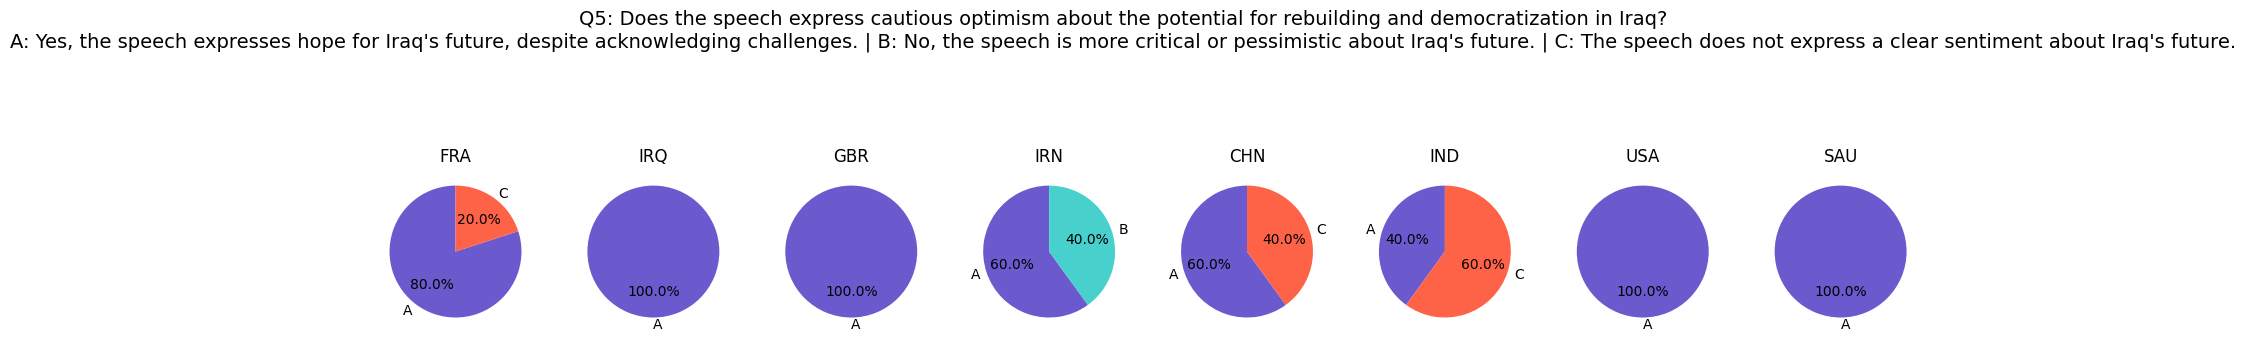

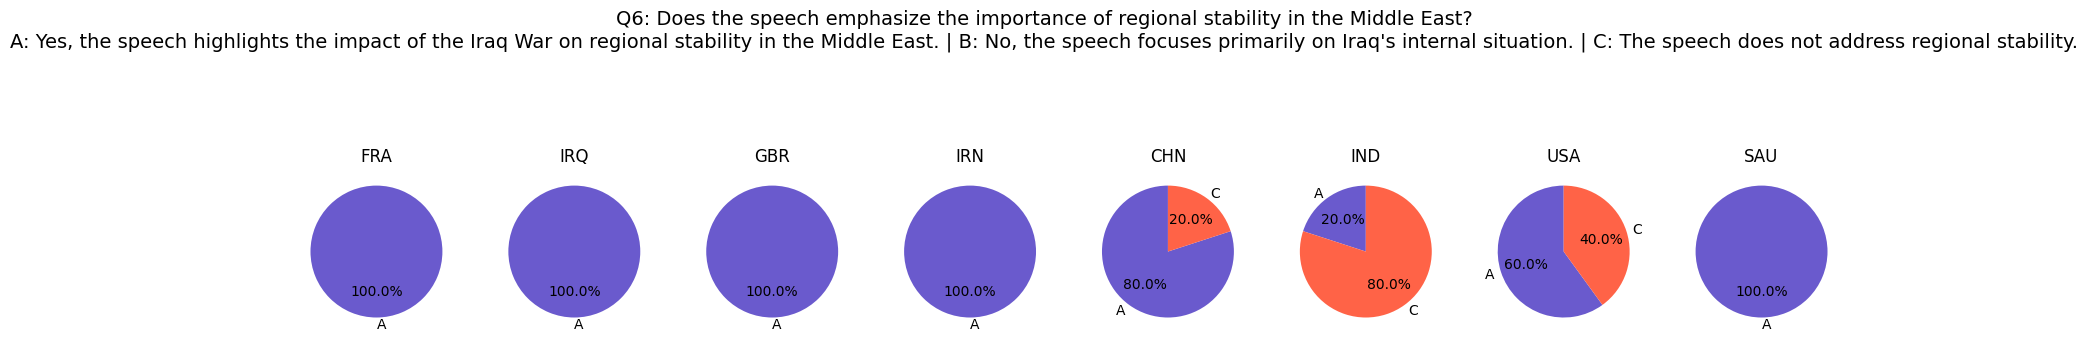

In [51]:
# Load the data and questions JSON (assuming these are loaded correctly)

questions_data = {
    "Q1": {
        "question": "Does the speech emphasize the importance of the United Nations' role in legitimizing military interventions?",
        "choices": {
            "A": "Yes, the speech strongly supports the need for UN authorization before military action.",
            "B": "No, the speech justifies military action regardless of UN authorization.",
            "C": "The speech does not address this issue."
        }
    },
    "Q2": {
        "question": "Is the restoration of Iraqi sovereignty and the transfer of power to the Iraqi people a primary focus of the speech?",
        "choices": {
            "A": "Yes, the speech highlights the importance of Iraqi sovereignty and self-determination.",
            "B": "No, the speech focuses more on other issues, such as global security or regional stability.",
            "C": "The speech does not specifically mention Iraqi sovereignty."
        }
    },
    "Q3": {
        "question": "Does the speech criticize Western powers, particularly the United States, for their actions in the Iraq War?",
        "choices": {
            "A": "Yes, the speech is critical of Western powers and their role in the Iraq War.",
            "B": "No, the speech either supports Western actions or does not focus on them.",
            "C": "The speech does not address Western powers directly."
        }
    },
    "Q4": {
        "question": "Does the speech link the Iraq War to broader global concerns, such as terrorism or the proliferation of weapons of mass destruction?",
        "choices": {
            "A": "Yes, the speech connects the Iraq War to broader global concerns like terrorism or WMDs.",
            "B": "No, the speech focuses more on the specifics of the Iraq War without tying it to broader global issues.",
            "C": "The speech does not address broader global concerns."
        }
    },
    "Q5": {
        "question": "Does the speech express cautious optimism about the potential for rebuilding and democratization in Iraq?",
        "choices": {
            "A": "Yes, the speech expresses hope for Iraq's future, despite acknowledging challenges.",
            "B": "No, the speech is more critical or pessimistic about Iraq's future.",
            "C": "The speech does not express a clear sentiment about Iraq's future."
        }
    },
    "Q6": {
        "question": "Does the speech emphasize the importance of regional stability in the Middle East?",
        "choices": {
            "A": "Yes, the speech highlights the impact of the Iraq War on regional stability in the Middle East.",
            "B": "No, the speech focuses primarily on Iraq's internal situation.",
            "C": "The speech does not address regional stability."
        }
    }
}

# Convert the JSON data to a DataFrame
df = pd.DataFrame(articles)

# List of unique questions based on the question format in the `questions_data` dictionary
questions = questions_data.keys()

# List of countries
countries = df['country'].unique()

# Define a color map for the options A, B, C with dimmer colors
color_map = {'A': '#6A5ACD', 'B': '#48D1CC', 'C': '#FF6347'}

# Custom function to format the percentage display
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'{pct:.1f}%' if pct > 0 else ''
    return my_format

# Iterate through each question
for question in questions:
    fig, axes = plt.subplots(1, len(countries), figsize=(20, 5), subplot_kw={'aspect': 'equal'})
    
    # Retrieve question text and options
    question_text = questions_data[question]['question']
    choices = questions_data[question]['choices']
    
    # Create the title including question and options
    title = f"{question}: {question_text}\n"
    title += f"A: {choices['A']} | B: {choices['B']} | C: {choices['C']}"
    
    fig.suptitle(title, fontsize=14)
    
    # Iterate through each country and plot its pie chart
    for i, country in enumerate(countries):
        # Filter the DataFrame for the current country
        country_data = df[df['country'] == country]
        
        # Get the answer for the current question and count occurrences
        answer_counts = country_data['Narrative_answers'].apply(lambda x: x[question[-1]]).value_counts()
        
        # Sort the answer_counts to ensure the order of A, B, C
        answer_counts = answer_counts.reindex(['A', 'B', 'C'], fill_value=0)
        
        # Get colors for the current pie chart
        colors = [color_map[option] for option in answer_counts.index]
        
        # Filter out labels with 0% to avoid displaying them
        labels = [f'{idx}' if value > 0 else '' for idx, value in zip(answer_counts.index, answer_counts.values)]
        
        # Plot the pie chart
        axes[i].pie(answer_counts, labels=labels, colors=colors, 
                    autopct=autopct_format(answer_counts), startangle=90)
        axes[i].set_title(country)
    
    plt.show()


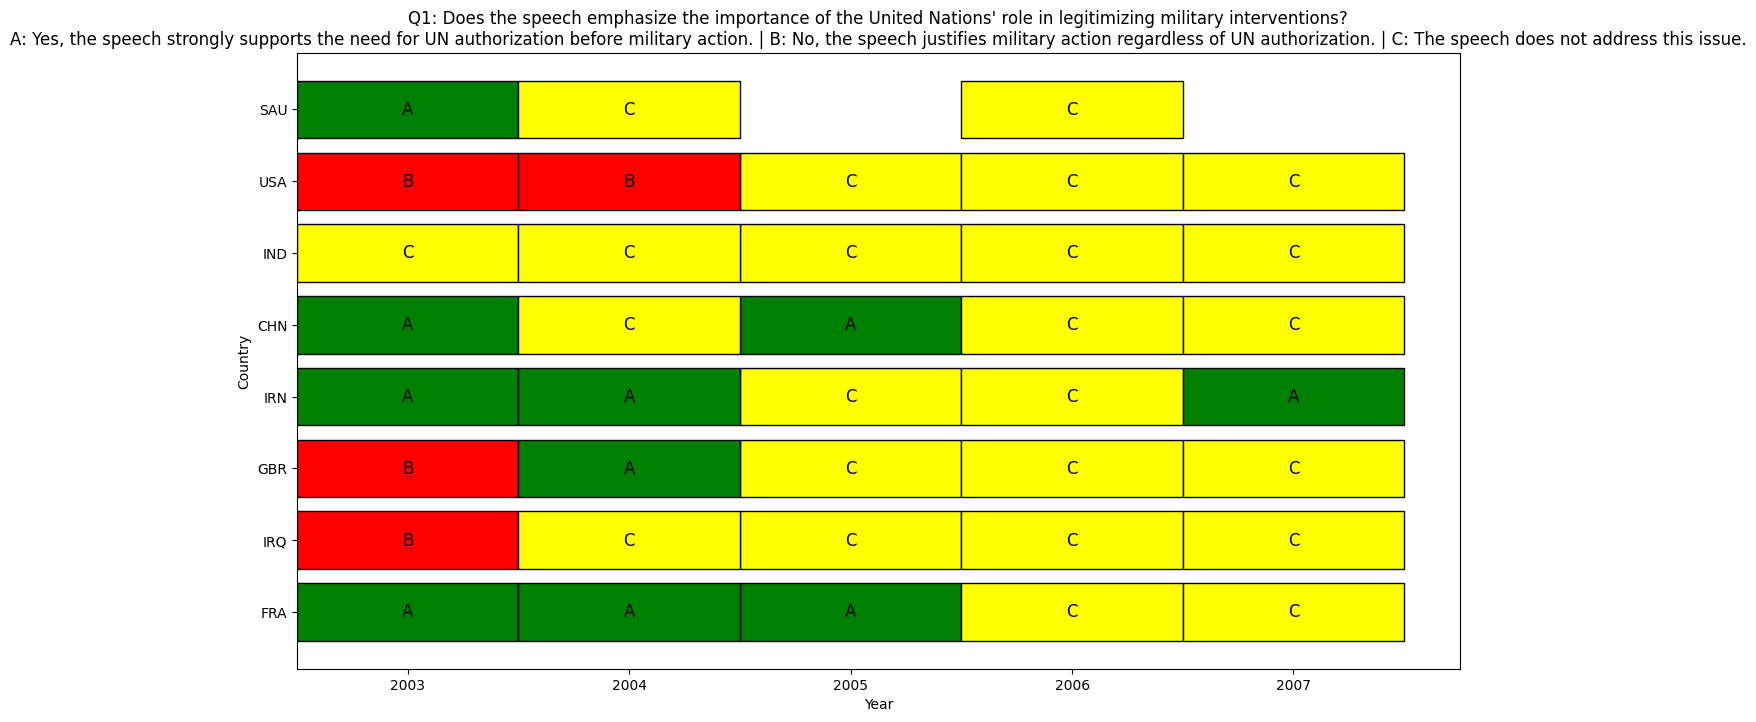

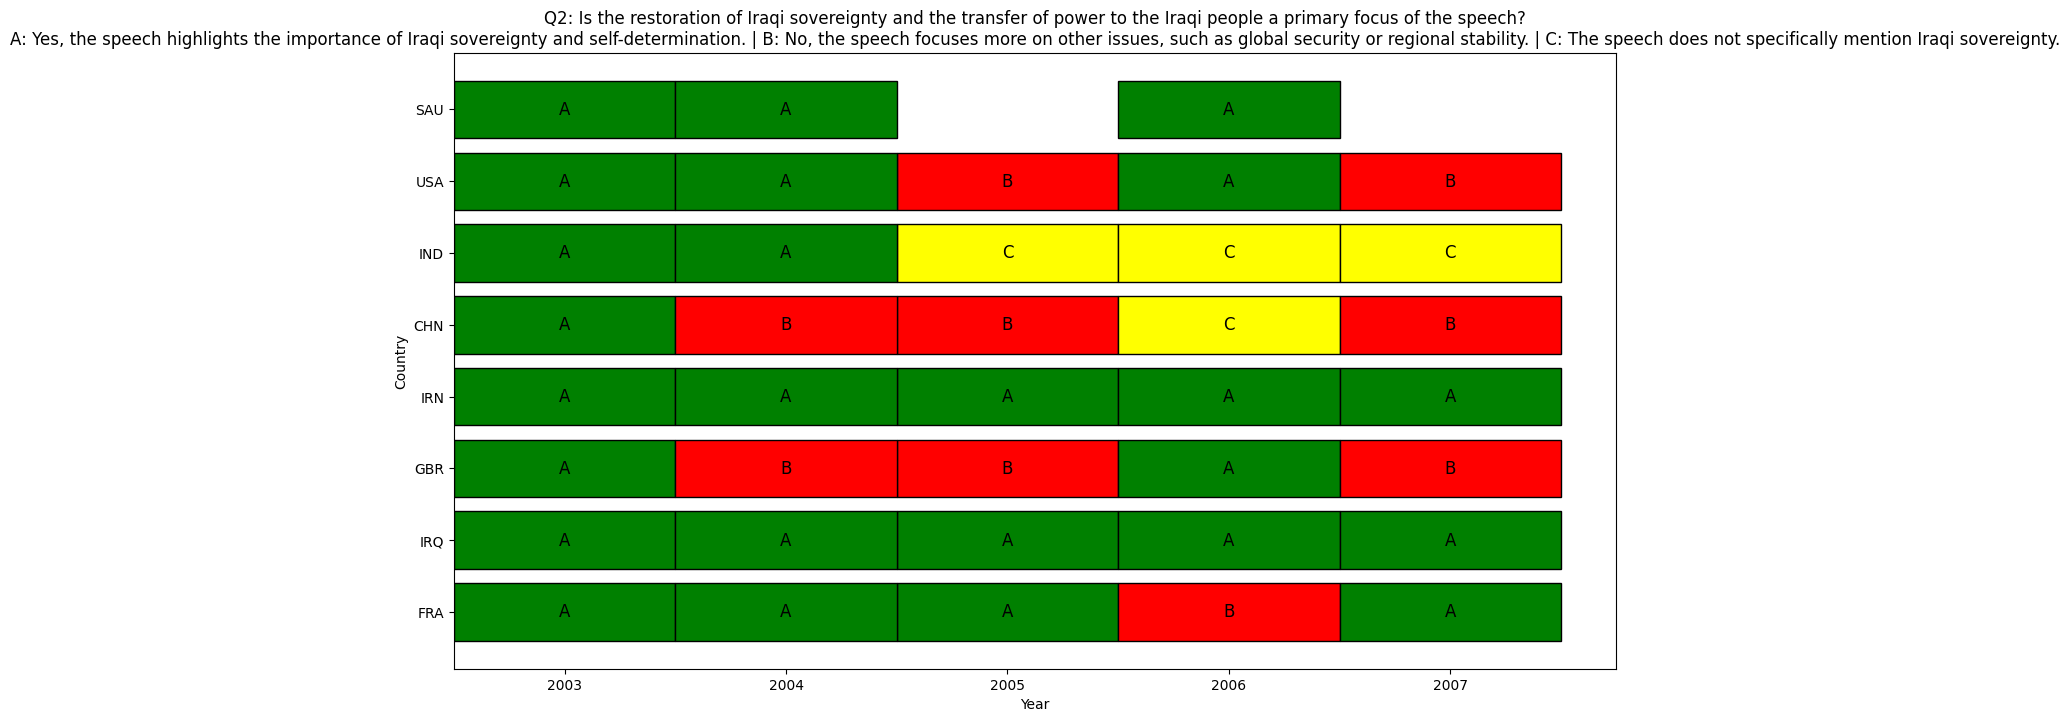

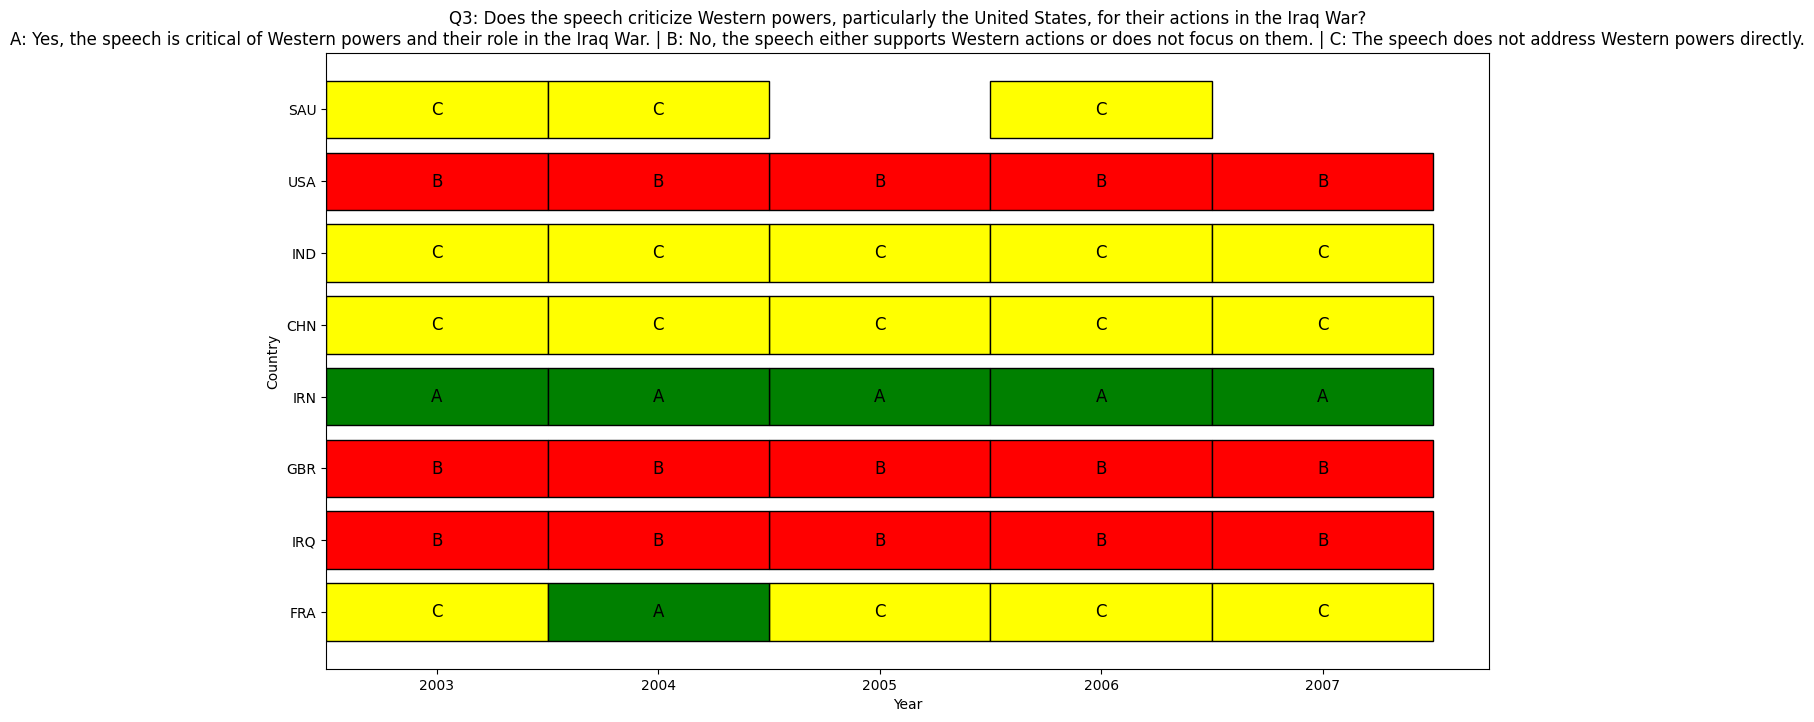

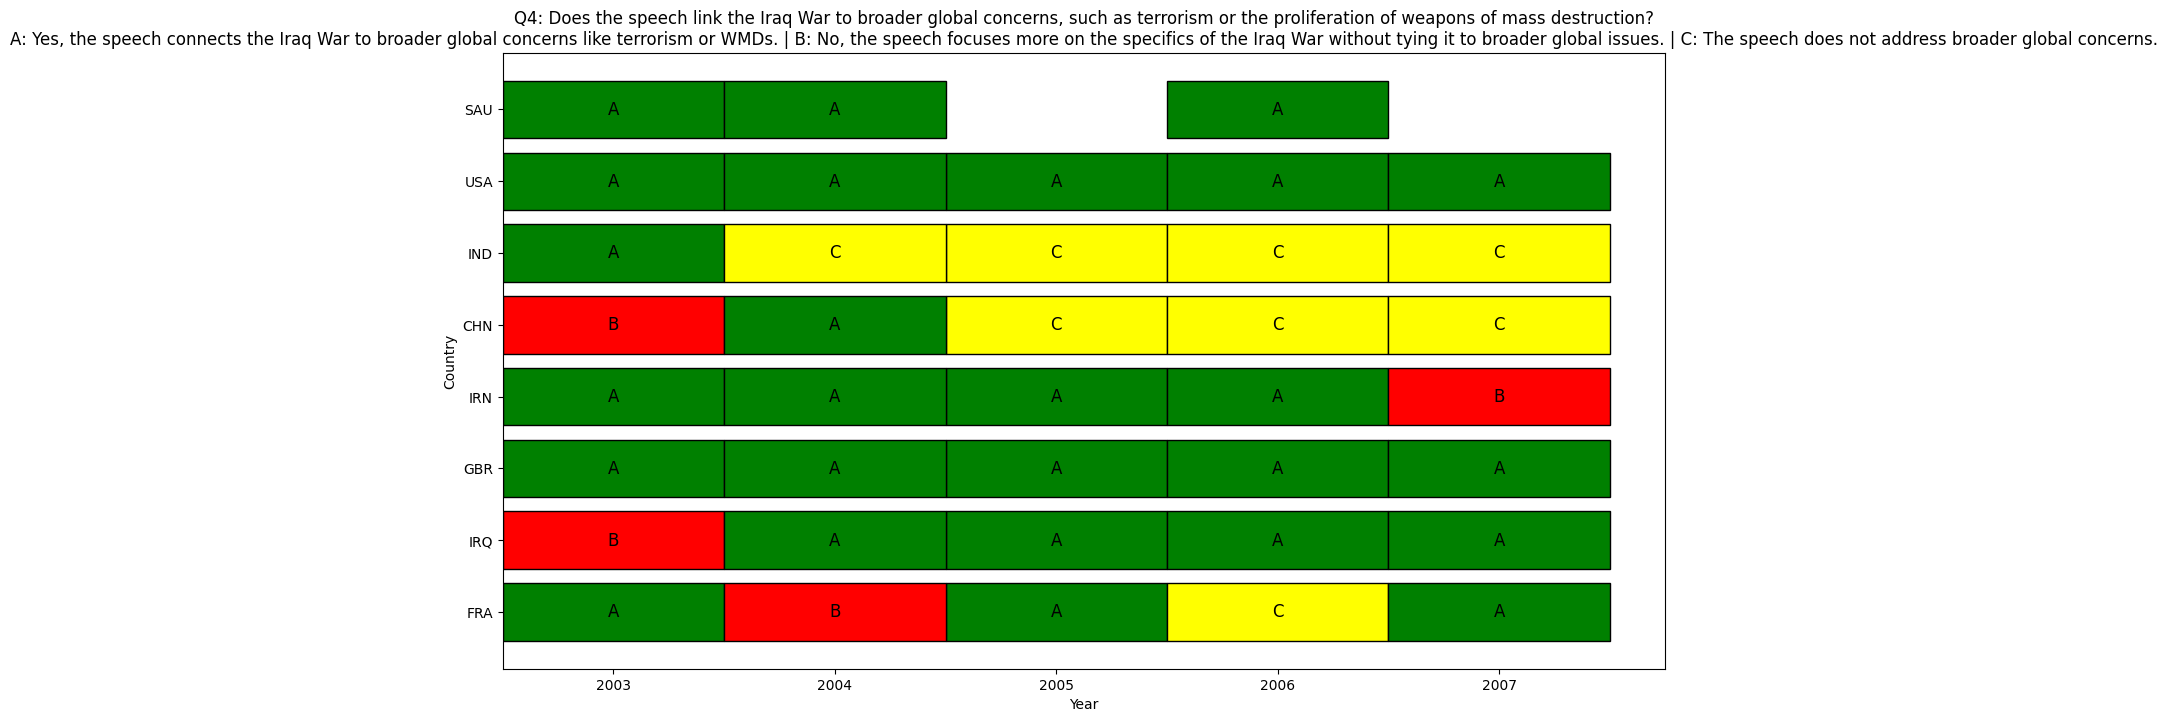

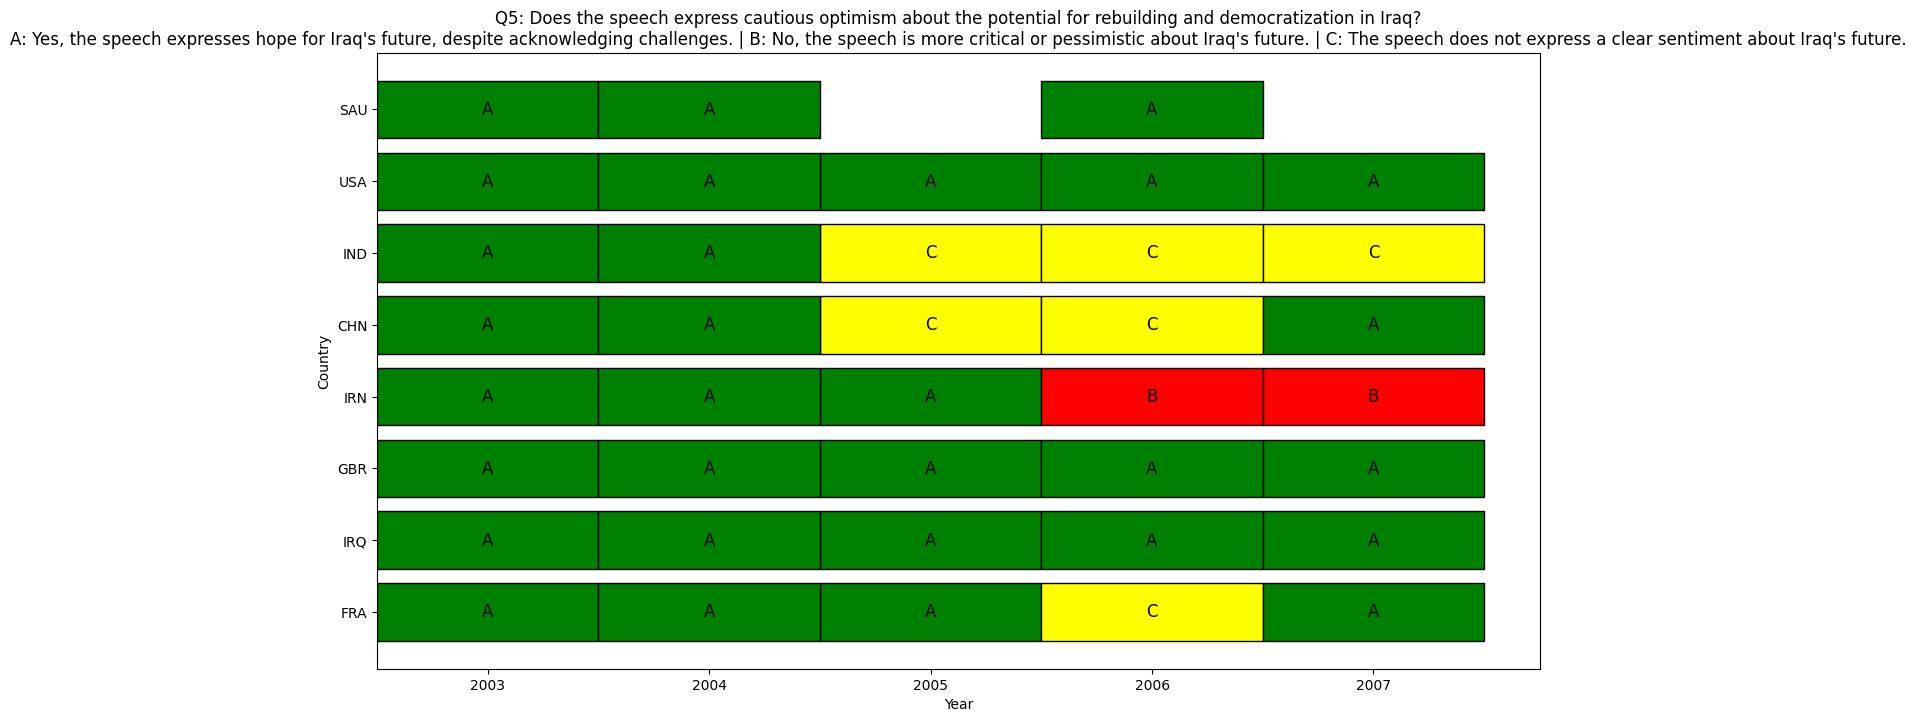

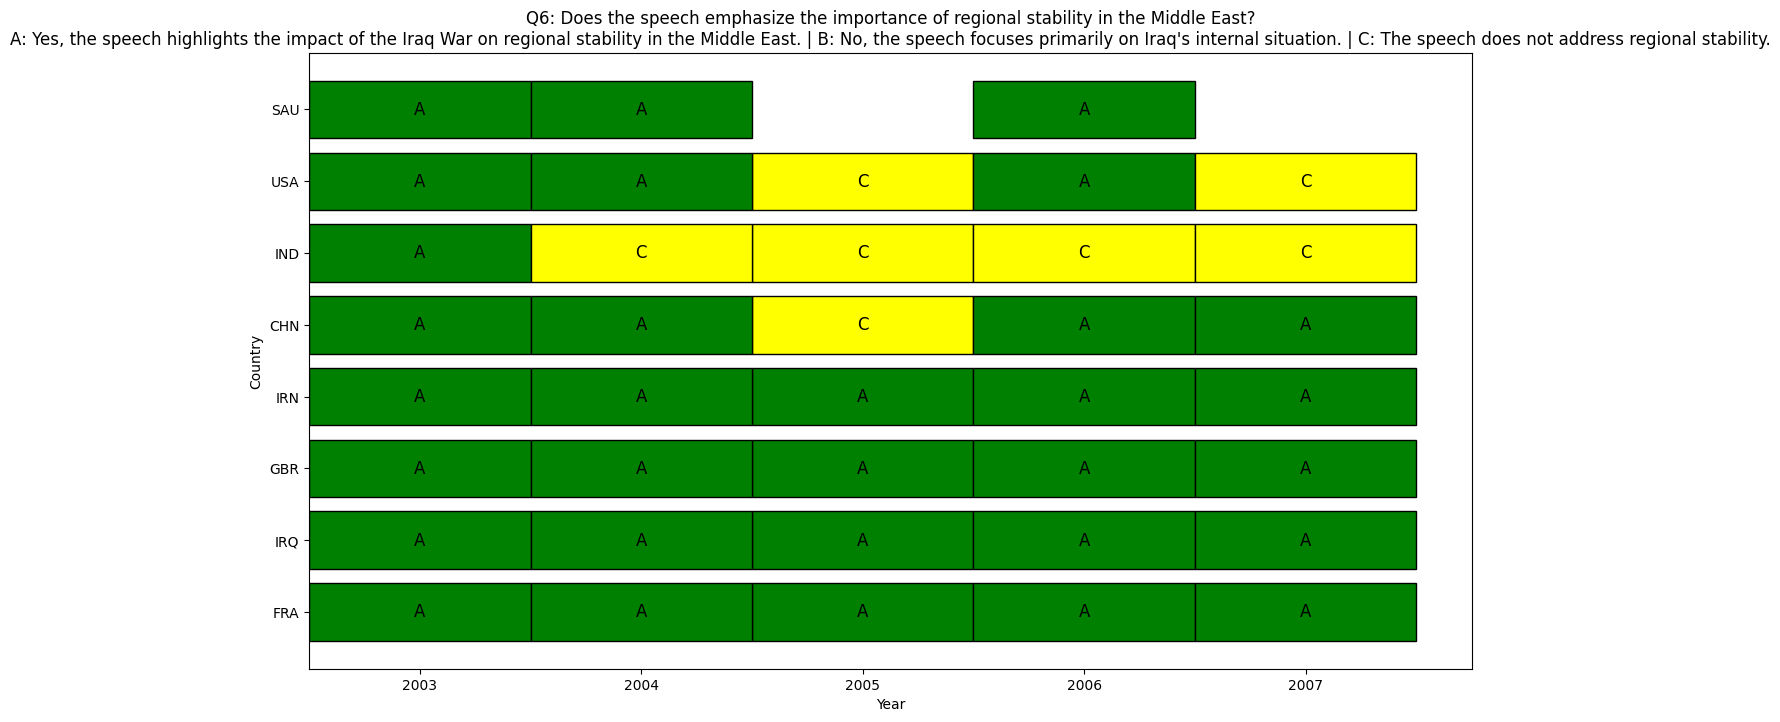

In [67]:
# Define color mapping for options
color_map = {'A': 'green', 'B': 'red', 'C': 'yellow'}

# List of unique questions
questions = list(questions_data.keys())

# List of unique countries
countries = df['country'].unique()

# Iterate over each question
for question in questions:
    plt.figure(figsize=(15, 8))
    
    # Set up the y-ticks (countries)
    y_pos = np.arange(len(countries))
    
    # Iterate over each year
    for year in df['year'].unique():
        # Filter data for the current year
        year_data = df[df['year'] == year]
        
        # Get the answer counts for each country for the current question
        answers = year_data['Narrative_answers'].apply(lambda x: x[question[-1]])
        
        # Plot bars for each country based on the answers
        for i, country in enumerate(countries):
            if country in year_data['country'].values:
                country_answer = answers[year_data['country'] == country].values[0]
                plt.barh(i, 1, left=year - 0.5, color=color_map[country_answer], edgecolor='black')
                plt.text(year, i, country_answer, va='center', ha='center', color='black', fontsize=12)
    
    # Set x and y axis labels
    plt.xlabel('Year')
    plt.ylabel('Country')
    plt.yticks(y_pos, countries)
    plt.xticks(np.arange(df['year'].min(), df['year'].max() + 1))
    
    # Retrieve question text and options
    question_text = questions_data[question]['question']
    choices = questions_data[question]['choices']
    
    # Create the title including question and options
    title = f"{question}: {question_text}\n"
    title += f"A: {choices['A']} | B: {choices['B']} | C: {choices['C']}"
    
    # Set the title to the current question with options
    plt.title(title, fontsize=12)
    
    # Show the plot
    plt.show()

### 0: China
### 1: France
### 2: UK
### 3: India
### 4: Iran
### 5: Iraq
### 6: Saudi Arabia
### 7: USA

In [52]:
with open("../data/processed/UN_data_with_narrative_answers.json") as f:
    data = json.load(f)

df = pd.DataFrame(data)
labels = df['label'].to_list()

(38, 3)


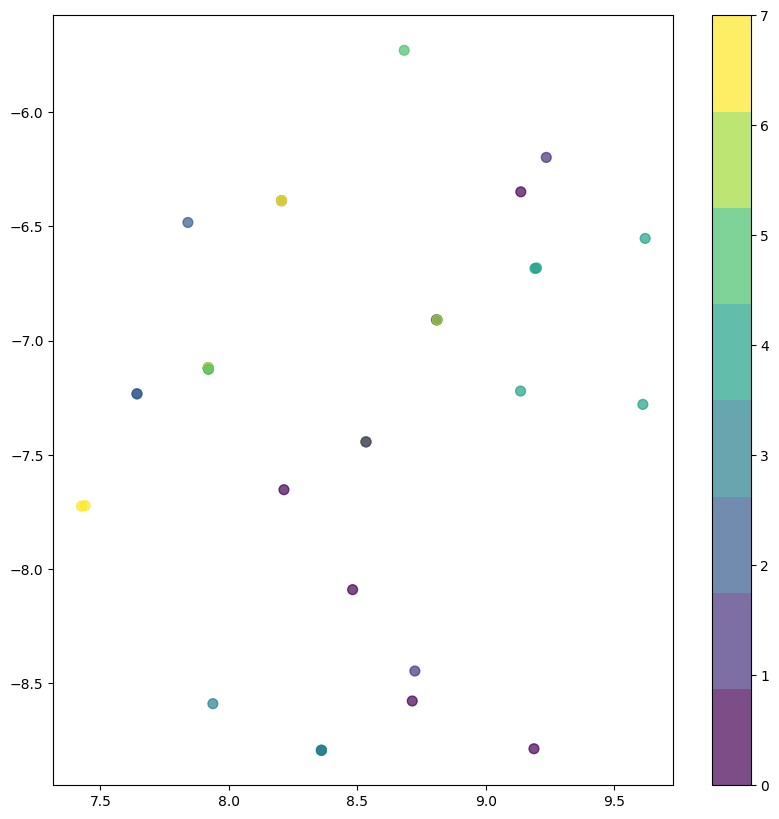

In [53]:
# Load the latent vectors
df_vectors = pd.read_csv("../data/processed/latent_vector_3.csv", header=None)
data_vectors = df_vectors.values
print(data_vectors.shape)

# Check the number of samples
n_samples = data_vectors.shape[0]

# Set the perplexity parameter to be less than the number of samples
perplexity = min(30, n_samples - 1)

# Apply TSNE to reduce the dimensions to 2D
tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
v_2d = tsne.fit_transform(data_vectors)

# Create a scatter plot with different colors for each label
plt.figure(figsize=(10, 10))

# Define a colormap for 7 distinct labels (0-6)
colors = plt.get_cmap('viridis', 8)

# Plot the 2D embeddings
sc = plt.scatter(v_2d[:, 0], v_2d[:, 1], c=labels, cmap=colors, s=50, alpha=0.7)

# Adding a colorbar and adjusting to show the range of labels
cbar = plt.colorbar(sc)
cbar.set_ticks(np.arange(0, 8))
cbar.set_ticklabels(np.arange(0, 8))

plt.show()

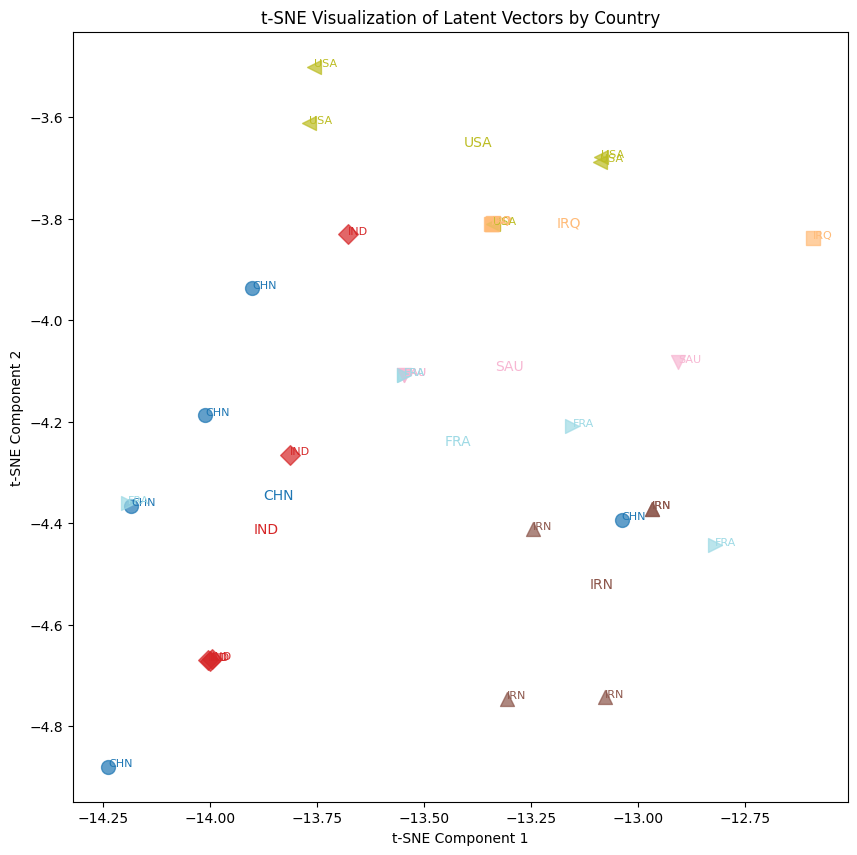

In [43]:
# Load the latent vectors
df_vectors = pd.read_csv("../data/processed/latent_vector_3.csv", header=None)
data_vectors = df_vectors.values

# Load the labels (assuming they are country names)
with open("../data/processed/UN_data_with_narrative_answers.json") as f:
    data = json.load(f)

df = pd.DataFrame(data)
labels = df['country'].to_list()
countries = df['country'].to_list()

# Check for consistency in lengths
if len(data_vectors) != len(labels):
    raise ValueError("Mismatch between the number of data points and labels")

# Check the number of samples
n_samples = data_vectors.shape[0]

# Set the perplexity parameter to be less than the number of samples
perplexity = min(30, n_samples - 1)

# Apply TSNE to reduce the dimensions to 2D
tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
v_2d = tsne.fit_transform(data_vectors)

# Create a scatter plot with different marker shapes for each country
plt.figure(figsize=(10, 10))

# Define a list of markers and colors to use for different countries
markers = ['o', 's', 'D', '^', 'v', '<', '>']  # Add more if necessary
unique_labels = list(set(labels))
colors = plt.cm.tab20(np.linspace(0, 1, len(unique_labels)))  # Define a color map

# Create a dictionary mapping each unique label to a specific marker and color
marker_map = {label: markers[i % len(markers)] for i, label in enumerate(unique_labels)}
color_map = {label: colors[i % len(colors)] for i, label in enumerate(unique_labels)}

# Plot each point with the corresponding marker, color, and label
for i in range(len(v_2d)):
    x, y = v_2d[i]
    plt.scatter(x, y, marker=marker_map[labels[i]], color=color_map[labels[i]], s=100, alpha=0.7)
    plt.text(x, y, countries[i], fontsize=8, color=color_map[labels[i]])

# Handle overlapping labels by concatenating them
for label in unique_labels:
    x_coords = [v_2d[i][0] for i in range(len(v_2d)) if labels[i] == label]
    y_coords = [v_2d[i][1] for i in range(len(v_2d)) if labels[i] == label]
    plt.text(np.mean(x_coords), np.mean(y_coords), ', '.join(set([countries[i] for i in range(len(v_2d)) if labels[i] == label])), fontsize=10, color=color_map[label], bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

# Display the plot
plt.title("t-SNE Visualization of Latent Vectors by Country")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()


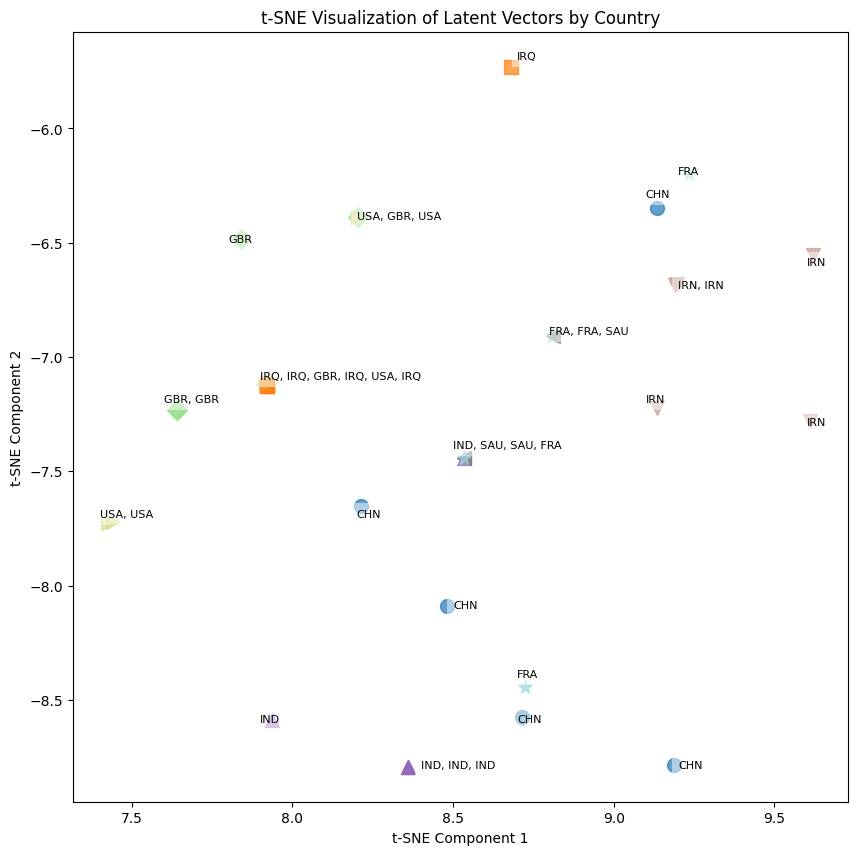

In [54]:
# Load the latent vectors
df_vectors = pd.read_csv("../data/processed/latent_vector_3.csv", header=None)
data_vectors = df_vectors.values

# Load the labels (assuming they are country names)
with open("../data/processed/UN_data_with_narrative_answers.json") as f:
    data = json.load(f)

df = pd.DataFrame(data)
labels = df['country'].to_list()
countries = df['country'].to_list()

# Check for consistency in lengths
if len(data_vectors) != len(labels):
    raise ValueError("Mismatch between the number of data points and labels")

# Check the number of samples
n_samples = data_vectors.shape[0]

# Set the perplexity parameter to be less than the number of samples
perplexity = min(30, n_samples - 1)

# Apply TSNE to reduce the dimensions to 2D
tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
v_2d = tsne.fit_transform(data_vectors)

# Create a scatter plot with different marker shapes for each country
plt.figure(figsize=(10, 10))

# Define a list of markers and colors to use for different countries
markers = ['o', 's', 'D', '^', 'v', '<', '>','*']  # Add more if necessary
unique_labels = list(set(labels))
colors = plt.cm.tab20(np.linspace(0, 1, len(unique_labels)))  # Define a color map

# Create a dictionary mapping each unique label to a specific marker and color
marker_map = {label: markers[i % len(markers)] for i, label in enumerate(unique_labels)}
color_map = {label: colors[i % len(colors)] for i, label in enumerate(unique_labels)}

# Create a dictionary to hold positions and their respective country labels
position_labels = {}

# Plot each point with the corresponding marker, color, and label
for i in range(len(v_2d)):
    x, y = v_2d[i]
    plt.scatter(x, y, marker=marker_map[labels[i]], color=color_map[labels[i]], s=100, alpha=0.7)
    
    # Group labels by their positions, rounded to avoid too many different groups
    rounded_pos = (round(x, 1), round(y, 1))
    if rounded_pos not in position_labels:
        position_labels[rounded_pos] = []
    position_labels[rounded_pos].append(countries[i])

# Add labels to the plot, separating them by commas for overlapping points
for pos, country_list in position_labels.items():
    x, y = pos
    label = ', '.join(country_list)
    plt.text(x, y, label, fontsize=8, color='black', bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

# Display the plot
plt.title("t-SNE Visualization of Latent Vectors by Country")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

In [56]:
with open("../data/processed/UN_data_with_narrative_answers.json") as f:
    data = json.load(f)

df = pd.DataFrame(data)
labels = df['country'].to_list()
countries = df['country'].to_list()
years = df['year'].to_list()

# Load the latent vectors
df_vectors = pd.read_csv("../data/processed/latent_vector_3.csv", header=None)

#add the year and countries column to the latent vectors
df_vectors['year'] = years
df_vectors['country'] = countries


,0,1,2,year,country
0,0.056985,0.696111,-1.200530,2005,FRA
1,1.200501,-0.958681,0.596717,2005,IRQ
2,0.521151,-1.933931,-0.428610,2005,GBR
3,1.066295,1.714488,1.218618,2005,IRN
4,-4.723327,-2.440693,-2.206698,2005,CHN


In [58]:
# Define the Euclidean distance function
def euclidean_distance(vec1, vec2):
    return np.sqrt(np.sum((vec1 - vec2)**2))

# Create a new column 'distance'
df_vectors['distance'] = np.nan

# Iterate over each row in the dataframe
for i, row in df_vectors.iterrows():
    # Get the current country's latent vector and year
    current_vector = row[[0, 1, 2]].values
    current_year = row['year']
    current_country = row['country']
    
    # Get the US vector for the same year
    us_vector = df_vectors[(df_vectors['year'] == current_year) & (df_vectors['country'] == 'USA')].iloc[0][[0, 1, 2]].values
    
    # Calculate the Euclidean distance and assign it to the 'distance' column
    df_vectors.at[i, 'distance'] = euclidean_distance(current_vector, us_vector)

df_vectors


,0,1,2,year,country,distance
0,0.056985,0.696111,-1.200530,2005,FRA,4.296962
1,1.200501,-0.958681,0.596717,2005,IRQ,2.268990
2,0.521151,-1.933931,-0.428610,2005,GBR,1.907374
3,1.066295,1.714488,1.218618,2005,IRN,4.683673
4,-4.723327,-2.440693,-2.206698,2005,CHN,5.945935
5,-3.282681,-0.102446,2.550609,2005,IND,4.613048
6,0.140701,-2.876694,1.185247,2005,USA,0.000000
7,0.002301,1.449942,-2.736704,2003,CHN,3.579659
8,0.056982,0.696110,-1.200527,2003,FRA,2.611460
9,0.056992,0.696118,-1.200525,2003,SAU,2.611453


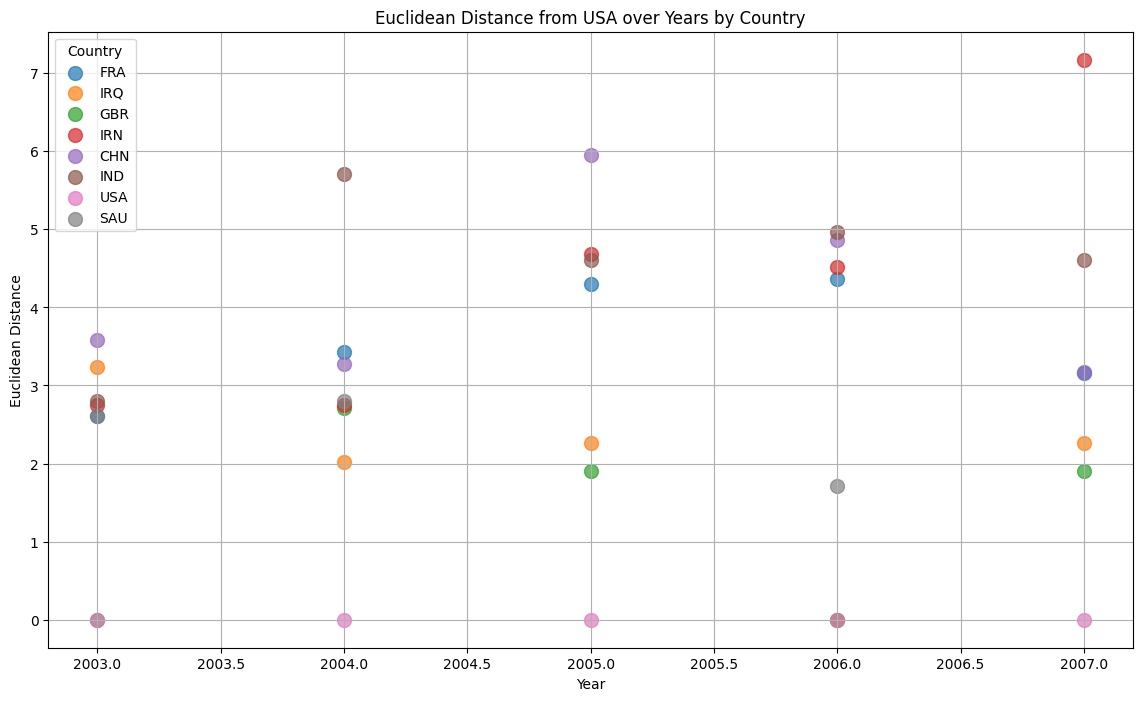

In [61]:
# Ensure the 'year' column is treated as a numerical value
df_vectors['year'] = pd.to_numeric(df['year'])

# List of unique countries
countries = df_vectors['country'].unique()

# Create scatter plots for each country
plt.figure(figsize=(14, 8))

for country in countries:
    # Filter the data for the current country
    country_data = df_vectors[df_vectors['country'] == country]
    
    # Create a scatter plot for the current country
    plt.scatter(country_data['year'], country_data['distance'], label=country, s=100, alpha=0.7)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Euclidean Distance')
plt.title('Euclidean Distance from USA over Years by Country')
plt.legend(title='Country')
plt.grid(True)

# Show the plot
plt.show()

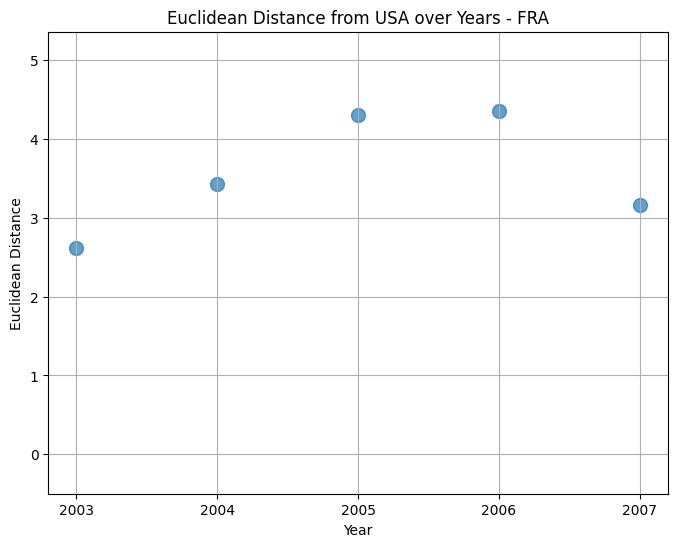

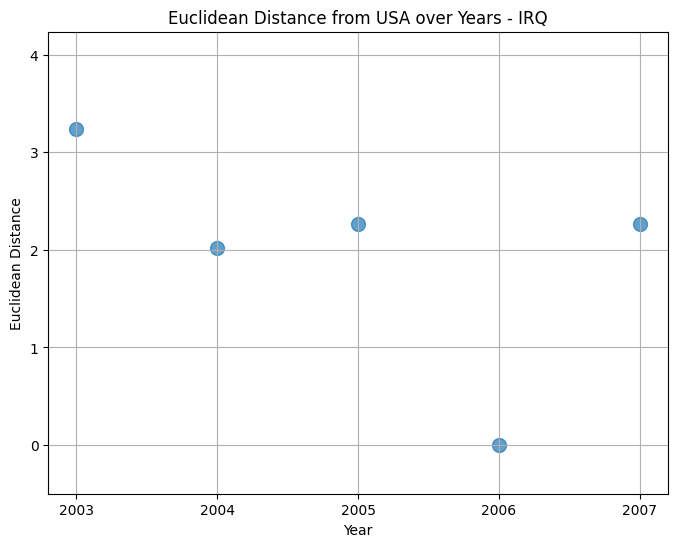

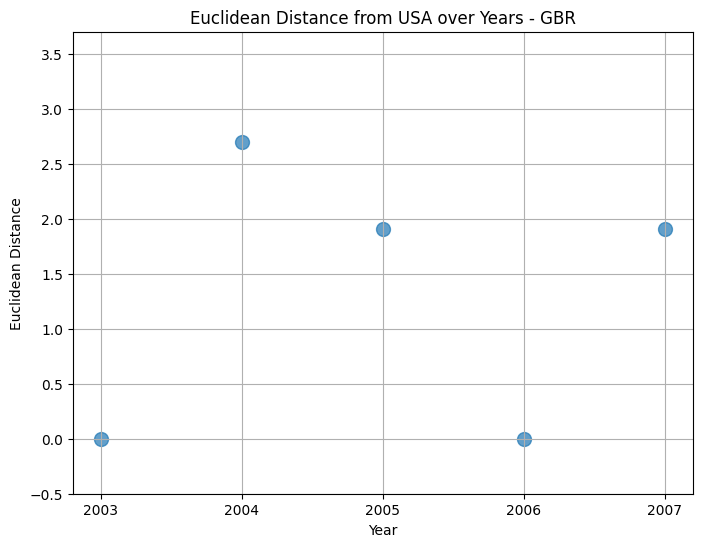

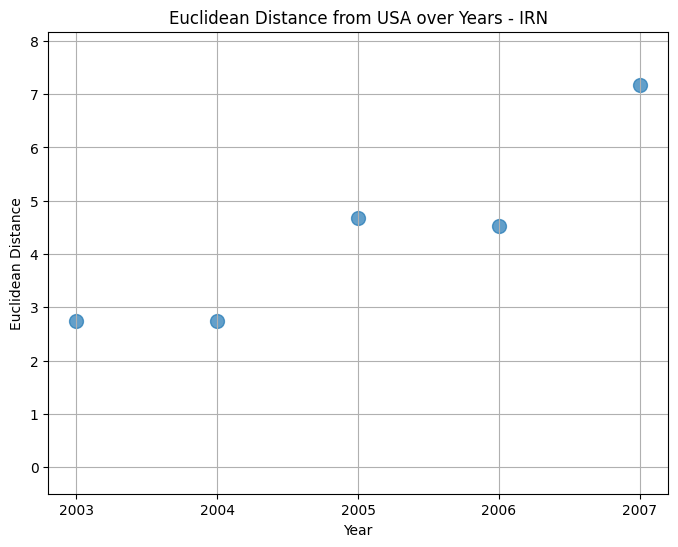

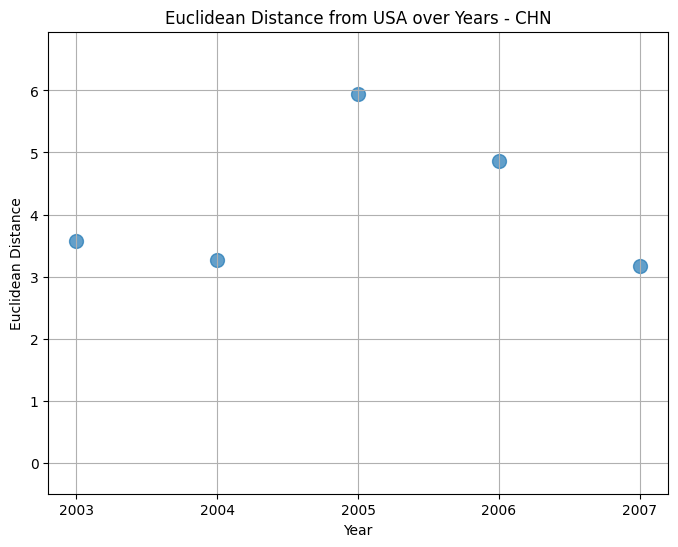

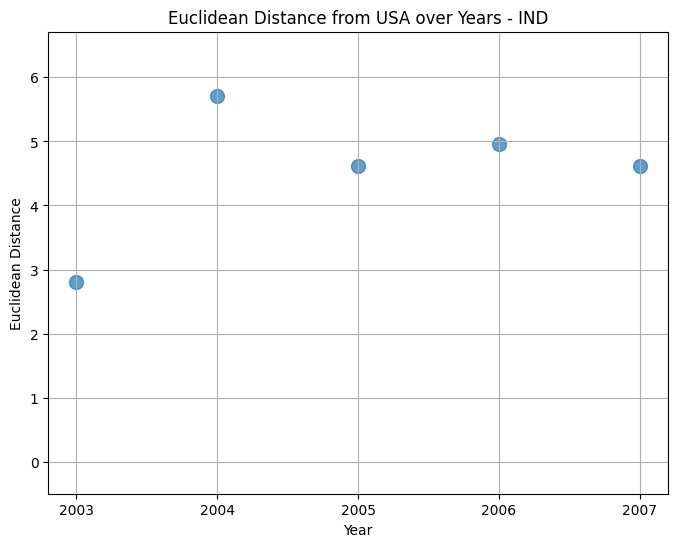

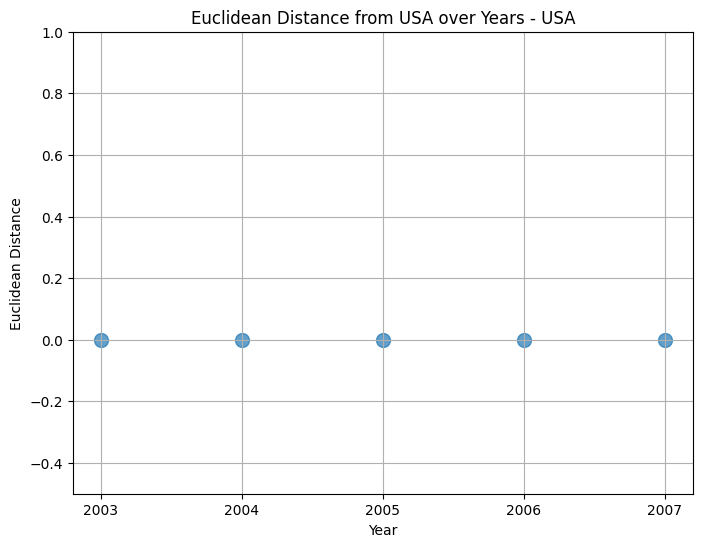

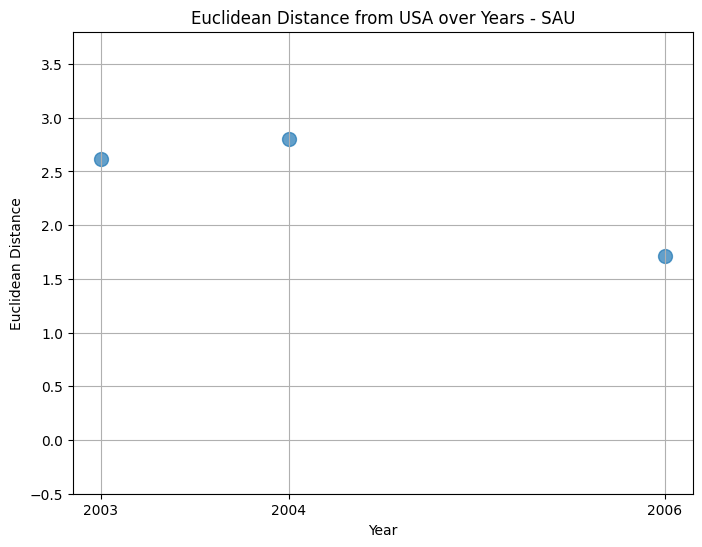

In [65]:
df_vectors['year'] = pd.to_numeric(df['year'])

# List of unique countries
countries = df_vectors['country'].unique()

# Create scatter plots for each country
for country in countries:
    # Filter the data for the current country
    country_data = df_vectors[df['country'] == country]
    
    # Create a new figure for each country
    plt.figure(figsize=(8, 6))
    
    # Create a scatter plot for the current country
    plt.scatter(country_data['year'], country_data['distance'], s=100, alpha=0.7)
    plt.xticks(ticks=country_data['year'].unique())
    # Adding labels and title
    plt.xlabel('Year')
    plt.ylabel('Euclidean Distance')
    plt.title(f'Euclidean Distance from USA over Years - {country}')
    plt.ylim(-0.5, max(country_data['distance']) + 1)
    plt.grid(True)
    
    # Show the plot for the current country
    plt.show()
